# Chapter 02 - Carane Ngolah Data Koyok Data Scientist
# Week 3

## Step 3: Explore Data

In [1]:
# import library
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# path tempat dataset housing
HOUSING_PATH = os.path.join("datasets", "housing", "")

# load the data
housing = pd.read_csv(HOUSING_PATH + "housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# display info dari dataset
housing.info()

# ternyata ada missing values di total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# data string
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# data numerik
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


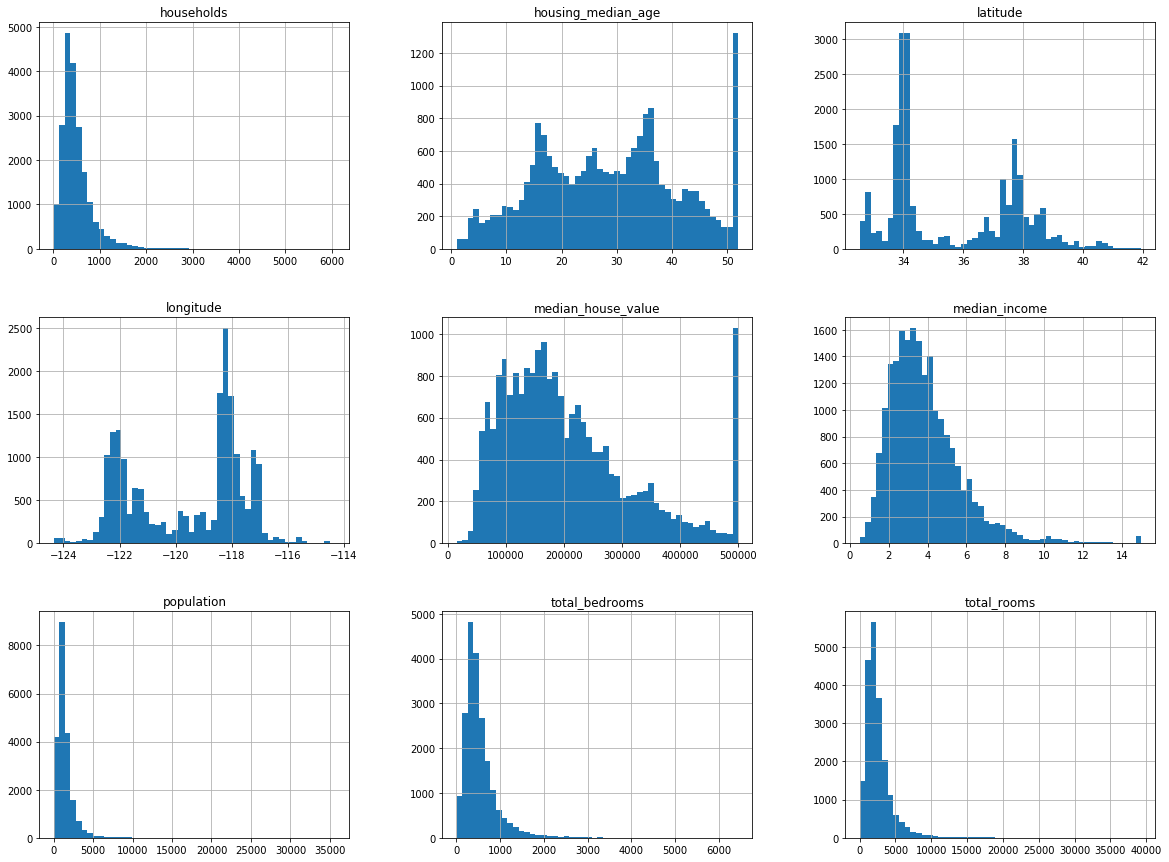

In [7]:
# visualize data dengan matplotlib
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Create Test Set
Kita tidak boleh melihat **test set**, karena bisa jadi model yang kita buat akan menyesuaikan pattern yang sudah kita lihat untuk meningkatkan perfoma model.

In [8]:
# untuk membuat hasil identik setiap dijalankan
np.random.seed(30)

In [9]:
# fungsi untuk membagi dataset
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), '+', len(test_set))

16512 + 4128


In [11]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19449,-121.03,37.68,20.0,3204.0,625.0,2016.0,605.0,2.6567,110400.0,INLAND
10452,-117.66,33.46,26.0,2073.0,370.0,952.0,340.0,5.0877,288100.0,<1H OCEAN
18982,-122.01,38.26,12.0,4132.0,710.0,2087.0,633.0,4.5987,139700.0,INLAND
8187,-118.11,33.78,16.0,3985.0,567.0,1327.0,564.0,7.9767,500001.0,<1H OCEAN
15759,-122.44,37.77,52.0,2994.0,736.0,1428.0,700.0,3.0766,438900.0,NEAR BAY


### Scikit-Learn

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=30)

In [14]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19449,-121.03,37.68,20.0,3204.0,625.0,2016.0,605.0,2.6567,110400.0,INLAND
10452,-117.66,33.46,26.0,2073.0,370.0,952.0,340.0,5.0877,288100.0,<1H OCEAN
18982,-122.01,38.26,12.0,4132.0,710.0,2087.0,633.0,4.5987,139700.0,INLAND
8187,-118.11,33.78,16.0,3985.0,567.0,1327.0,564.0,7.9767,500001.0,<1H OCEAN
15759,-122.44,37.77,52.0,2994.0,736.0,1428.0,700.0,3.0766,438900.0,NEAR BAY


# Week 4

**Penting membagi data dengan benar, `test set` yang kita bagi sebaiknya representative dari keseluruhan populasi**
- `median_income` merupakan variable penting penentu harga rumah
- Kita tahu bahwa `median_income` datanya berupa continous numerical attribute, sehingga kita bagi menjadi beberapa kategori
- Diperhatikan data terkumpul pada nilai `20k` - `50k` dan beberapa di `60k`

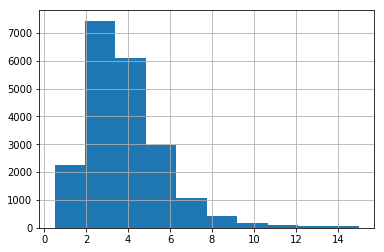

In [15]:
housing["median_income"].hist()

In [16]:
# dibagi dengan 1.5 untuk membatasi jumlah kategori income
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

# data yang di atas 5, diberi label 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [17]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

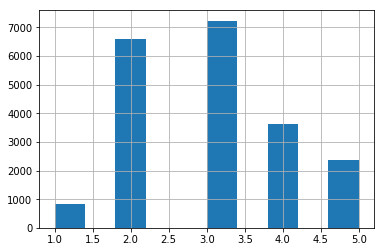

In [18]:
housing["income_cat"].hist()

In [19]:
# sekarang kita telah siap melakukan stratified sampling berdasarkan income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
# kita lihat proporsi dari income category pada test set
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [21]:
# kita bandingkan dengan data housing
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

**Bagaimana perbandingannya menggunakan `random` dan `stratified`?**

In [22]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [23]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


In [24]:
# hapus 'income_cat' supaya normal
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Still Step 3: Visualize Data to gain insight

In [25]:
# agar kita tidak 'mengotak-atik' data training, lakukan copy untuk explore lebih jauh
housing = strat_train_set.copy()

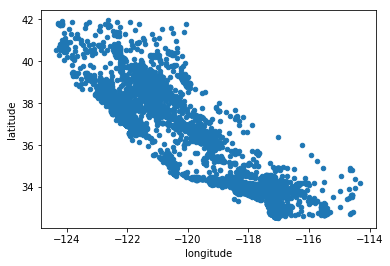

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude")

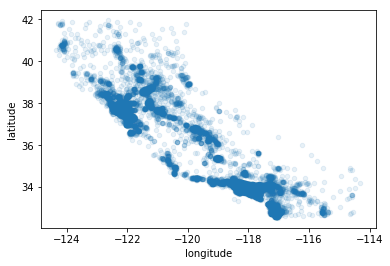

In [27]:
# untuk memperhatikan lebih dalam seperti kepadatan/dense, tambahkan nilai alpha
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

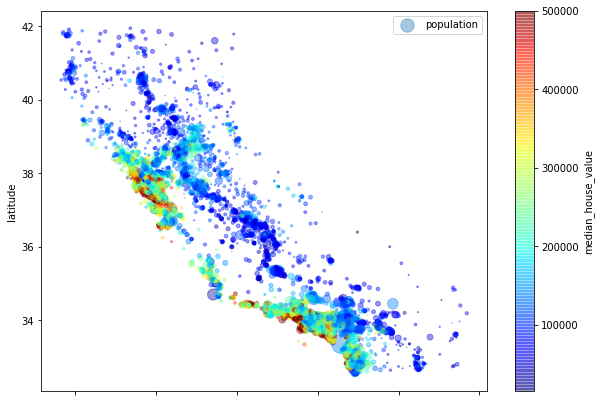

In [28]:
# kita tambahkan 'median_house_value' untuk visualisasi
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

**Berdasarkan gambar, kita menjadi tahu bahwa daerah utara harga murah dan dekat laut/pantai harga semakin mahal**

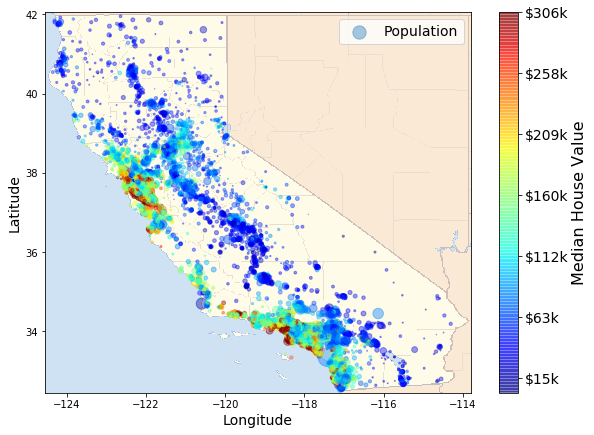

In [29]:
# agar lebih jelas visualisasinya digabungkan dengan image peta california
import matplotlib.image as mpimg
california_img=mpimg.imread('images/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=14)
plt.show()

## Still Step 3: Looking for Correlations
Karena ukuran dataset tidak terlalu besar, kita bisa menggunakan *standard correlation coefficient* atau *Pearson's r* pada setiap atribut.

Korelasi memiliki range -1 sampai 1. 
- Semakin dekat 1, artinya ada **strong positive correlation** (median_house_value naik ketika median_income juga naik).
- Semakin dekat -1, **strong negative correlation** (harga akan turun jika semakin ke bagian utara)
- 0, tidak ada linear correlation

In [30]:
# mencari korelasi
corr_matrix = housing.corr()

In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

**Dengan bantuan `pandas scatter_matrix` kita dibantu untuk melihat korelasi dengan graph**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF2635AA20>,
      dtype=object)

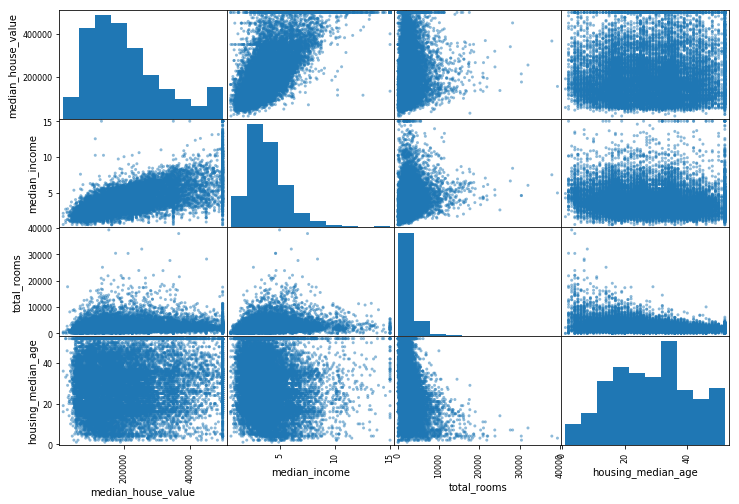

In [32]:
from pandas.plotting import scatter_matrix

# hanya pilih atribut yang penting, karena kalo ada 11 atribut, nanti ada 121 plot
attributes = ["median_house_value", "median_income", 
              "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

**Berdasarkan graph, diketahui bahwa atribut yang penting untuk prediksi `median house value` adalah `median income`**

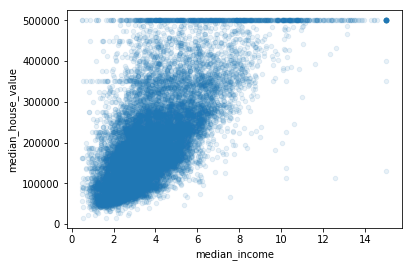

In [33]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

### Experimenting with Attribute Combinations
Kita juga dapat melakukan kombinasi antar atribut menjadi sebuah atribut baru, misalkan:
- **total_rooms** tidak berguna jika tidak tau banyak household -> jumlah **room per household**
- jumlah **total_bedrooms** tidak berguna, sehingga dapat dibandingkan dengan kamar -> **bedroom per room**
- jumlah population tiap household -> **population per household**

In [34]:
# lakukan kombinasi antar atribut
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [35]:
# coba lihat lagi korelasinya
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

**Hasilnya malah lebih bagus dibanding sebelumnya, didapatkan korelasi:**
- Semakin kecil **bedrooms per room** rasio, cenderung lebih mahal
- **rooms per household** juga lebih informatif dibandingkan **total rooms**

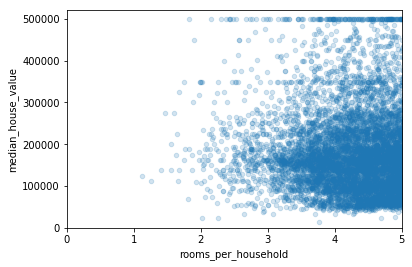

In [36]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [37]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Finally Step 4: Prepare data for machine learning algorithms

In [38]:
# drop label untuk training set
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

**Data Cleaning**

In [39]:
# cek data kosong
housing[housing.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


**Solusi:**
1. Menghapus baris dari **total bedrooms** yang terdapat data kosong
2. Menghilangkan atribut **total bedrooms**
3. Mengisi data kosong dari **total bedrooms** dengan median

In [40]:
# scikit-learn punya solusinya! Imputer!
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

Karena menghitung median hanya bisa digunakan pada *numerical attributes*, maka kita drop dulu atribut **ocean_proximity**

In [41]:
# your code
housing_num = housing.drop("ocean_proximity", axis=1)

In [42]:
# your code
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

Kita cek apakah sama nilai `median` dari menggunakan `Imputer` dengan manual

In [43]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [44]:
# manual
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Lakukan `transform`

In [45]:
# your code
X = imputer.transform(housing_num)

In [46]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [47]:
# convert ke pandas Data Frame
# your code
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [48]:
housing_tr[housing_tr.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


**Handling Text and Categorical Attribute**

Sekarang kita lakukan *preprocess* pada `ocean_proximity`

In [49]:
# your code
housing_cat = housing['ocean_proximity']
housing_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

Kita dapat merubahnya dengan fungsi pandas `factorize()`, yaitu dirubah untuk **<1H OCEAN** bernilai 0, **NEAR OCEAN** bernilai 1, dst.

Masalahnya (*sebagai permisalan saja*), bisa jadi untuk kategori 0 dan 4 lebih memiliki kedekatan dibandingkan dengan kategori 0 dan 2.
**Solusinya** dengan membuat binary atribut untuk setiap kategori. Misalkan akan bernilai 1 jika kategori **NEAR OCEAN**, kategori lain bernilai 0. Ini yang dinamakan **one-hot encoding**

In [50]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [51]:
#from sklearn.preprocessing import CategoricalEncoder # in future versions of Scikit-Learn

cat_encoder = CategoricalEncoder()
# your code
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Secara default, akan mengembalikan data berupa sparse array. Kita bisa mengubahnya menggunakan `toarray()` untuk mendapatkan dense array.

In [52]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Atau bisa juga dengan menspesifikasikan encoding bernilai `onehot-dense`

In [53]:
cat_encoder = CategoricalEncoder(encoding="onehot-dense")
# your code
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [54]:
# untuk melihat kategori 
# your code
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Custom Transformers**

Meskipun `scikit-learn` sudah tersedia banyak transformer data, kadang kita harus menulis code sendiri lagi agar menyesuaikan data pada tugas tertentu seperti kombinasi antar atribut. Semakin kita melakukan otomasi pada data preparation, akan semakin banyak kombinasi yang bisa dicoba, dan nantinya kita akan mengetahui kombinasi yang paling baik.

Berikut adalah transformer kombinasi antar atribut, seperti sudah dijelaskan sebelumnya.

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [56]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

**Feature Scaling**

Terdapat beberapa algoritma machine learning tidak memiliki performa bagus ketika masukan berupa data *numerical* yang memiliki skala berbeda. Misalkan pada `housing` data, **total number of rooms** memiliki range 6 sampai 39,320, tetapi pada **median income** hanya memiliki range 0 sampai 15.

Salah satu metode yang digunakan adalah `Standardization`.
- Pertama, akan mengurangi dengan nilai rata-rata
- Kemudian, dibagi dengan nilai variance

**Standardization** tidak terpengaruh jika terdapat *outlier*.

In [57]:
# pada scikit-learn terdapat library Standardization yaitu StandardScaler
from sklearn.preprocessing import StandardScaler

**Transformation Pipeline**

Karena banyak proses transformasi yang dilakukan, scikit-learn menyediakan library `Pipeline` untuk membantu dalam pengurutan transformasi. 

In [58]:
from sklearn.pipeline import Pipeline

In [59]:
# Dalam tranformasi nanti, terdapat tugas memilih subset dari Pandas DataFrame columns
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [60]:
# Berikut adalah keseluhan Pipeline
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
])

Untuk menggabungkan `num_pipeline` dan `cat_pipeline` menggunakan `FeatureUnion`

In [61]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [62]:
# lakukan transform
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [63]:
housing_prepared.shape

(16512, 16)

# Week 5
## Select and Train a Model

In [ ]:
# menggunakan linear regression
from sklearn.linear_model import LinearRegression

# your code

Mari kita coba dengan beberapa data dari `training set` untuk melakukan prediksi

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = # your code

print("prediksi:", lin_reg.predict(some_data_prepared))

Dibandingkan dengan nilai sebenarnya

In [ ]:
print("labels:", list(some_labels))

Mengukur performa model dengan *Root Mean Square Error*

In [ ]:
from sklearn.metrics import mean_squared_error

# your code

Kebanyakan nilai dari `median_housing_values` memiliki range **120.000 - 265.000**. Sehingga error dengan nilai **$x** tidak bagus. Ini merupakan contoh dari *underfitting* karena fitur tidak memberikan informasi yang cukup untuk menghasilkan prediksi yang bagus atau performa model tidak bagus. Solusinya dengan memberikan *learning algorithm* fitur yang lebih baik dan mengurangi *constraint* pada model. Pada kasus ini, model butuh dilakukan **regularization**.

In [ ]:
# coba menggunakan Decision Tree
from sklearn.tree import DecisionTreeRegressor

# your code

In [ ]:
# menghitung RMSE
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = # your code
tree_rmse = np.sqrt(tree_mse)
tree_rmse

Kenapa nilai `RMSE` pada Decision Tree `0`? Ini contoh mengalami *overfitting*

## Fine-Tune your Model

In [ ]:
# menggunakan cross validation
from sklearn.model_selection import cross_val_score

# your code

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Bandingkan dengan Linear Regression

In [ ]:
lin_scores = # your code
display_scores(lin_rmse_scores)

Bagaimana perbandingan antara `Decision Tree` dan `Linear Regression`? Mana yang terbaik?

Menggunakan `Random Forest Regressor` yang merupakan *Ensemble Learning*, membuat sebuah model di atas model lainnya.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# your code

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = # your code
forest_rmse

In [ ]:
from sklearn.model_selection import cross_val_score

# your code

`Random Forest Regressor` memiliki nilai **RMSE** yang lebih baik dari 2 *learning algorithm* lainnya. Tetapi, jika kita lihat *score* pada `training set` masih lebih rendah dari `validation set`, yang artinya masih terjadi *overfitting* pada data training.

## GridSearch
Untuk memilih kombinasi terbaik dari *hyperparameters*.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # your code
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
# parameter terbaik
grid_search.best_params_

In [ ]:
# estimator terbaik
grid_search.best_estimator_

Menampilkan *cross-validation score* dari proses `GridSearch`

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

## Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        # your code
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

## Analyze the best models and their errors
Misalkan pada `Random Forest Regressor`, kita bisa mencari fitur yang terpenting. 

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
# menampilkan score terpenting beserta atribut
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

# Evaluate your system on the test set

In [ ]:
final_model = grid_search.best_estimator_

# your code

print(final_rmse)